In [1]:
import torch
import torch.nn as nn
import torchtext
import spacy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import ast
import time
from others.config import *

hyperparameters = config['hyperparameters']
gpu = ('cuda:0')

In [2]:
TEXT = torchtext.data.Field(
    sequential = True,
    lower = True,
    batch_first = True,
    tokenize = 'spacy',
    pad_first = True
)

LABEL = torchtext.data.Field(
    sequential = False,
    use_vocab = False,
    is_target = True
)

In [3]:
dataset_ = torchtext.data.TabularDataset(
    path = 'dataset/train_dataset.csv', 
    format = 'csv',
    skip_header = True,
    fields = [
        ('data', TEXT),
        ('label', LABEL)
        ] 
)

In [4]:
print(dataset_[0].data)
print(dataset_[0].label)

['@menyrbie', '@phil_gahan', '@chrisitv', 'https://t.co/ifz9fan2', 'pa', 'and', 'https://t.co/xx6ghgfzcc', 'and', 'https://t.co/i2nlzdxno8']
2


In [5]:
doc_len = [len(dataset_[i].data) for i in range(len(dataset_))]
longest_len = max(doc_len)
print('The longest doc in dataset is {} words, {} Sentiment Score, with idx {}'.format(longest_len, int(dataset_[doc_len.index(longest_len)].label), doc_len.index(longest_len)))

The longest doc in dataset is 233 words, 2 Sentiment Score, with idx 8841


In [6]:
# print('doc : {}'.format(dataset_[doc_len.index(longest_len)].data))
# print('label : {}'.format(dataset_[doc_len.index(longest_len)].label))

In [7]:
train_dataset, validation_dataset = dataset_.split([0.7, 0.3], random_state = random.seed(14))

In [8]:
len(train_dataset), len(validation_dataset)

(28810, 12347)

In [9]:
TEXT.build_vocab(train_dataset)
vocab = TEXT.vocab
len(vocab)
# vocab.stoi

66116

In [10]:
train_iter, valid_iter = torchtext.data.BucketIterator.splits(
    (train_dataset, validation_dataset), 
    sort_key = lambda x: len(x.data),
    batch_sizes = (ast.literal_eval(hyperparameters['batch_sizes'])[0], ast.literal_eval(hyperparameters['batch_sizes'])[1]),
    device = gpu
)

In [11]:
for inputs, labels in train_iter:
    print('inputs: {}, shape: {}'.format(inputs, inputs.shape))
    print('lables: {}, shape: {}'.format(labels, labels.shape))
    break

inputs: tensor([[    1,     1,     1,  ...,    25,     2,    12],
        [    1,     1,     1,  ..., 59134,     2, 58575],
        [    1,     1,     1,  ...,  1549,   110,  1672],
        ...,
        [    1,     1,     1,  ...,    13,     2, 32014],
        [    1,     1,     1,  ...,     3,  1806, 62227],
        [    1,     1,     1,  ...,     2,    90, 39062]], device='cuda:0'), shape: torch.Size([64, 63])
lables: tensor([3, 1, 0, 3, 3, 4, 1, 2, 2, 1, 4, 3, 1, 2, 2, 0, 1, 0, 1, 3, 2, 1, 2, 1,
        3, 1, 2, 0, 1, 4, 1, 3, 1, 1, 0, 1, 2, 4, 3, 0, 2, 1, 3, 3, 3, 0, 3, 3,
        2, 1, 1, 3, 0, 1, 0, 2, 3, 0, 0, 1, 4, 2, 3, 1], device='cuda:0'), shape: torch.Size([64])


In [12]:
for inputs, labels in valid_iter:
    print('inputs: {}, shape: {}'.format(inputs, inputs.shape))
    print('lables: {}, shape: {}'.format(labels, labels.shape))
    break

inputs: tensor([[   47,   478,    20,  ...,     7,    70,    61],
        [   47,  1522,   325,  ...,    22,   863,     0],
        [ 1881,   795,   639,  ...,    59,   153,    61],
        ...,
        [    1,     1,     1,  ...,     1,   116, 29005],
        [    1,     1,     1,  ...,     1,  4645,    14],
        [    1,     1,     1,  ...,     1,   991,   218]], device='cuda:0'), shape: torch.Size([128, 8])
lables: tensor([2, 2, 3, 2, 1, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 3, 3, 1,
        2, 1, 3, 2, 0, 2, 1, 1, 3, 1, 2, 2, 2, 3, 0, 1, 3, 1, 2, 3, 2, 1, 2, 2,
        2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2, 3, 0, 2, 2,
        2, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2,
        2, 1, 2, 1, 1, 2, 3, 4, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2,
        2, 2, 2, 2, 2, 0, 2, 2], device='cuda:0'), shape: torch.Size([128])


In [13]:
batch_train = next(iter(train_iter))
doc_train, label_train = batch_train
batch_test = next(iter(valid_iter))
doc_valid, label_valid = batch_test

def itos_(iterator):
    docs_ = []
    for i in range (len(iterator)):
        x = iterator[i].item()
        doc = str(TEXT.vocab.itos[x])
        docs_.append(doc)
    docs = ' '.join(docs_)
    return docs, docs_

In [14]:
print(itos_(doc_train[0])[0])
print('label: {}'.format(label_train[0]))

<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> we know how hard it is to meet regular food needs with snap that s why we re so glad oregon will be increasing benefits for many snap households so we can all stock up and protect our families during this time learn more here
label: 4


In [15]:
# for accessing specific batch
every_batch = []
for batch in enumerate(train_iter):
    every_batch.append(batch)   
    # print(batch)
    # inputs, labels = batch.Review, batch.Label
    # print(inputs.shape, labels.shape)

In [16]:
class BiLSTM(nn.Module):
    def __init__(self, n_vocabs, embed_dims, n_lstm_units, n_lstm_layers, n_output_classes):
        super(BiLSTM, self).__init__()
        self.v = n_vocabs
        self.e = embed_dims
        self.u = n_lstm_units
        self.l = n_lstm_layers
        self.o = n_output_classes

        self.embed = nn.Embedding(
            self.v,
            self.e
            )
        self.bilstm = nn.LSTM(
            input_size = self.e,
            hidden_size = self.u,
            num_layers = self.l,
            batch_first = True,
            bidirectional = True,
            dropout = 0.5
        )
        self.linear = nn.Linear(
            self.u * 2,
            self.o
        )

    def forward(self, X):
        h0 = torch.zeros(self.l * 2, X.size(0), self.u).to(gpu)
        c0 = torch.zeros(self.l * 2, X.size(0), self.u).to(gpu)

        out = self.embed(X)
        # NxTxh, lxNxh
        out, _ = self.bilstm(out, (h0, c0))
        # GMP
        out, _ = torch.max(out, 1)
        out = self.linear(out)
        iout = torch.max(out, 1)[1]

        return iout, out

In [17]:
torch.manual_seed(14)
model = BiLSTM(
    len(vocab), 
    int(hyperparameters['embed_dims']), 
    int(hyperparameters['num_lstm_units']), 
    int(hyperparameters['num_lstm_layers']), 
    int(hyperparameters['num_output_classes'])
    ).to(gpu)
criterion = nn.CrossEntropyLoss().to(gpu)
optimizer = torch.optim.Adam(
    model.parameters(), 
    lr = float(hyperparameters['learning_rate'])
    )

In [18]:
print(model)

BiLSTM(
  (embed): Embedding(66116, 512)
  (bilstm): LSTM(512, 512, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Linear(in_features=1024, out_features=5, bias=True)
)


In [23]:
import sys
num_epochs = int(hyperparameters['num_epochs'])
losses = []
accuracies  = []
val_losses = []
val_accuracies = []
val_loss_min = np.inf

for epoch in range(num_epochs):
    print('------------------------------------------------------------------------------------------')
    print('epoch: {}/{}:'.format(epoch + 1, num_epochs))   
    print('------------------------------------------------------------------------------------------')
    t0 = time.time()

    train_tqdm_bar = tqdm(enumerate(train_iter), total = (len(train_iter)), leave = False, position = 0, file = sys.stdout, dynamic_ncols = True)
    val_tqdm_bar = tqdm(enumerate(valid_iter), total = (len(valid_iter)),  leave = False, position = 0, file = sys.stdout, dynamic_ncols = True)

    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    model.train()
    for idx, (reviews, labels) in train_tqdm_bar:
        iout, out = model(reviews)
        loss = criterion(out, labels)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm = 1)
        optimizer.step()
        running_loss += loss
        running_corrects += torch.sum(iout == labels)
        train_tqdm_bar.set_description(desc = 'train   '.format(epoch + 1, num_epochs))
        batch_idx = (idx + 1) * ast.literal_eval(hyperparameters['batch_sizes'])[0]

        train_tqdm_bar.set_postfix(
            loss = running_loss.item() / batch_idx if idx + 1 < len(train_iter) else running_loss.item() / len(train_iter.dataset)
            ,acc = running_corrects.item() / batch_idx if idx + 1 < len(train_iter) else running_corrects.item() / len(train_iter.dataset)
            )
    
    model.eval()
    with torch.no_grad():
        for val_idx, (v_reviews, v_labels) in val_tqdm_bar:
            v_iout, v_out = model(v_reviews)
            v_loss = criterion(v_out, v_labels)
            val_running_loss += v_loss
            val_running_corrects += torch.sum(v_iout == v_labels)
            val_tqdm_bar.set_description('validate'.format(epoch + 1, num_epochs))
            val_batch_idx = (val_idx + 1) * ast.literal_eval(hyperparameters['batch_sizes'])[1]

            val_tqdm_bar.set_postfix(
            val_loss = val_running_loss.item() / val_batch_idx if val_idx + 1 < len(valid_iter) else val_running_loss.item() / len(valid_iter.dataset)
            ,val_acc = val_running_corrects.item() / val_batch_idx if val_idx + 1 < len(valid_iter) else val_running_corrects.item() / len(valid_iter.dataset)
            )
    
    epoch_loss = running_loss/len(train_iter.dataset)
    losses.append(epoch_loss)
    epoch_accuracy = running_corrects/len(train_iter.dataset)
    accuracies.append(epoch_accuracy)
    val_epoch_loss = val_running_loss/len(valid_iter.dataset)
    val_losses.append(val_epoch_loss)
    val_epoch_accuracy = val_running_corrects/len(valid_iter.dataset)
    val_accuracies.append(val_epoch_accuracy)

    checkpoint = {
            'epoch': epoch + 1
            ,'state_dict': model.state_dict()
            ,'optimizer' : optimizer.state_dict()
            ,'val_loss_min' : val_epoch_loss
        }
    
    print('training loss: {:.4f}, acc: {:.2f}'.format(epoch_loss, epoch_accuracy))
    print('validation loss: {:.4f}, acc: {:.2f}'.format(val_epoch_loss, val_epoch_accuracy))
    print('epoch time: {:.2f} seconds'.format(time.time() - t0))

    if val_epoch_loss <= val_loss_min:
        print('validation loss decreased from {:.4f} to {:.4f}, saving model...'.format(val_loss_min, val_epoch_loss))
        torch.save(checkpoint, 'checkpoint/corona_tweets_lowest_val_loss_epoch_{}.pth'.format(epoch + 1))
        val_loss_min = val_epoch_loss

------------------------------------------------------------------------------------------
epoch: 1/20:
------------------------------------------------------------------------------------------
training loss: 0.0183, acc: 0.50
validation loss: 0.0086, acc: 0.53
epoch time: 68.29 seconds
validation loss decreased from inf to 0.0086, saving model...
------------------------------------------------------------------------------------------
epoch: 2/20:
------------------------------------------------------------------------------------------
training loss: 0.0109, acc: 0.74
validation loss: 0.0060, acc: 0.71
epoch time: 71.36 seconds
validation loss decreased from 0.0086 to 0.0060, saving model...
------------------------------------------------------------------------------------------
epoch: 3/20:
------------------------------------------------------------------------------------------
training loss: 0.0062, acc: 0.86
validation loss: 0.0071, acc: 0.69
epoch time: 72.34 seconds
------

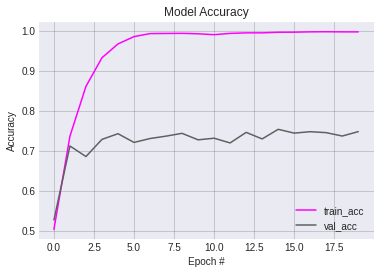

In [27]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(accuracies, color = 'magenta')
plt.plot(val_accuracies, color = '#606060')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend(['train_acc', 'val_acc'], loc = 'lower right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
plt.savefig('graphs/acc_bilstm.png', dpi = 100)

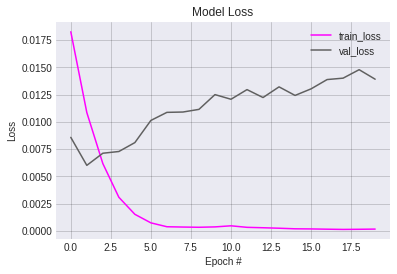

In [28]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(losses, color = 'magenta')
plt.plot(val_losses, color = '#606060')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)
plt.savefig('graphs/loss_bilstm.png', dpi = 100)

In [29]:
torch.save(model.state_dict(), 'model/corona_tweets_bilstm_last_epoch.pth')